<a href="https://colab.research.google.com/github/KatePomazunova/GoIT_HW_DS/blob/main/hw11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Dropout
from keras.utils import pad_sequences
from keras.utils import to_categorical

In [23]:
max_features = 10000
maxlen = 500
batch_size = 128

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [21]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32, input_length=maxlen))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_rnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history_rnn = model_rnn.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 84s 161ms/step - loss: 0.6283 - acc: 0.6397 - val_loss: 0.4560 - val_acc: 0.8023
Epoch 2/5
137/137 [==============================] - 24s 175ms/step - loss: 0.4224 - acc: 0.8265 - val_loss: 0.4796 - val_acc: 0.7832
Epoch 3/5
137/137 [==============================] - 23s 169ms/step - loss: 0.3484 - acc: 0.8625 - val_loss: 0.3953 - val_acc: 0.8251
Epoch 4/5
137/137 [==============================] - 23s 170ms/step - loss: 0.2890 - acc: 0.8882 - val_loss: 0.3816 - val_acc: 0.8364
Epoch 5/5
137/137 [==============================] - 25s 181ms/step - loss: 0.2605 - acc: 0.8997 - val_loss: 0.3679 - val_acc: 0.8499


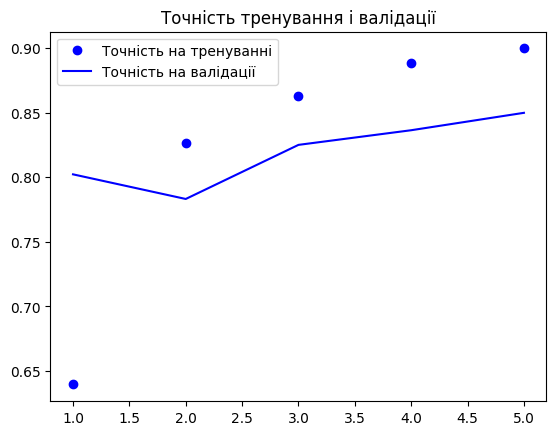

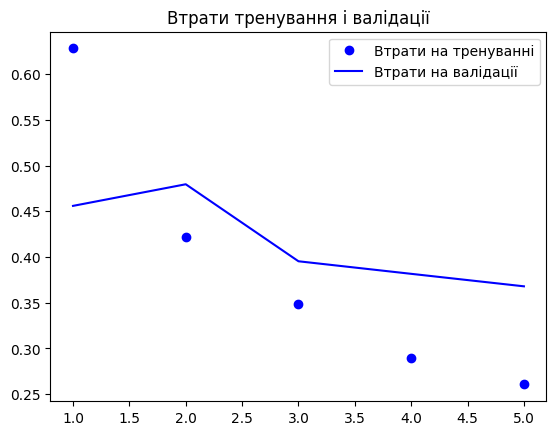

In [24]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [25]:
predictions = model_rnn.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model_rnn.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 20s 25ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 21s 27ms/step - loss: 0.3684 - acc: 0.8511
Test Loss: 0.3684016466140747
Test Accuracy: 0.8511199951171875


In [30]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32, input_length=maxlen))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
history_lstm = model_lstm.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 53s 373ms/step - loss: 0.6465 - acc: 0.6243 - val_loss: 0.5089 - val_acc: 0.7697
Epoch 2/5
137/137 [==============================] - 50s 362ms/step - loss: 0.4119 - acc: 0.8290 - val_loss: 0.3252 - val_acc: 0.8673
Epoch 3/5
137/137 [==============================] - 54s 398ms/step - loss: 0.3013 - acc: 0.8858 - val_loss: 0.3096 - val_acc: 0.8684
Epoch 4/5
137/137 [==============================] - 50s 363ms/step - loss: 0.2582 - acc: 0.9038 - val_loss: 0.2956 - val_acc: 0.8749
Epoch 5/5
137/137 [==============================] - 53s 387ms/step - loss: 0.2195 - acc: 0.9219 - val_loss: 0.3249 - val_acc: 0.8671


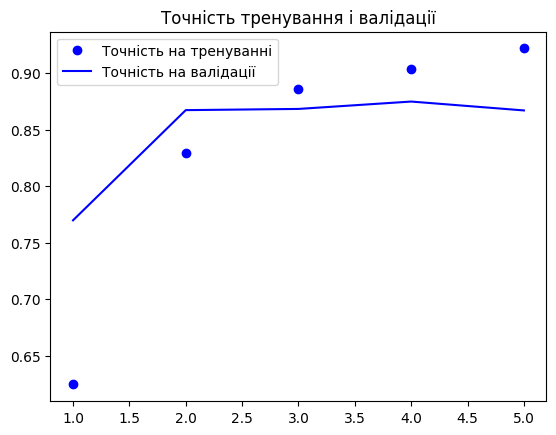

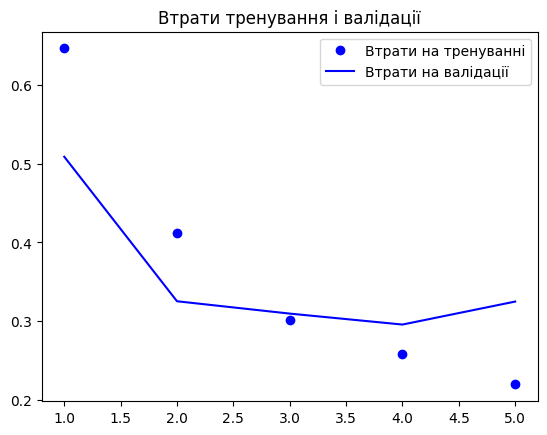

In [32]:
acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [33]:
predictions = model_lstm.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model_lstm.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 38s 48ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 47s 60ms/step - loss: 0.3401 - acc: 0.8598
Test Loss: 0.34009796380996704
Test Accuracy: 0.8597599864006042


In [34]:
model_brnn = Sequential()
model_brnn.add(Embedding(max_features, 32, input_length=maxlen))
model_brnn.add(Bidirectional(LSTM(32)))
model_brnn.add(Dropout(0.5))
model_brnn.add(Dense(1, activation='sigmoid'))

model_brnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_brnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 32)           320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
history_brnn = model_brnn.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 121s 682ms/step - loss: 0.6260 - accuracy: 0.6438 - val_loss: 0.4720 - val_accuracy: 0.7986
Epoch 2/5
157/157 [==============================] - 113s 720ms/step - loss: 0.3872 - accuracy: 0.8446 - val_loss: 0.3611 - val_accuracy: 0.8558
Epoch 3/5
157/157 [==============================] - 100s 639ms/step - loss: 0.2917 - accuracy: 0.8881 - val_loss: 0.5202 - val_accuracy: 0.8284
Epoch 4/5
157/157 [==============================] - 95s 606ms/step - loss: 0.2539 - accuracy: 0.9082 - val_loss: 0.2960 - val_accuracy: 0.8808
Epoch 5/5
157/157 [==============================] - 100s 640ms/step - loss: 0.2210 - accuracy: 0.9183 - val_loss: 0.3237 - val_accuracy: 0.8734


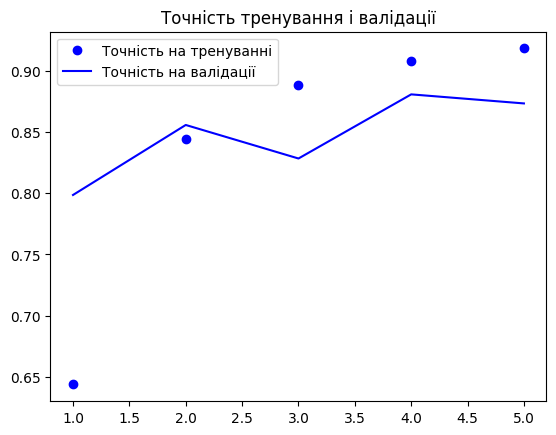

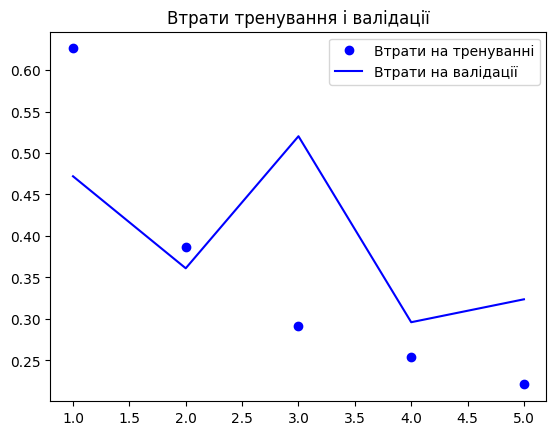

In [40]:
acc = history_brnn.history['accuracy']
val_acc = history_brnn.history['val_accuracy']
loss = history_brnn.history['loss']
val_loss = history_brnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [41]:
predictions = model_brnn.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model_brnn.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 57s 72ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 58s 74ms/step - loss: 0.3420 - accuracy: 0.8625
Test Loss: 0.34202873706817627
Test Accuracy: 0.8624799847602844


In [42]:
model_drnn = Sequential()
model_drnn.add(Embedding(max_features, 32, input_length=maxlen))
model_drnn.add(LSTM(32, return_sequences=True))
model_drnn.add(Dropout(0.5))
model_drnn.add(LSTM(32))
model_drnn.add(Dropout(0.5))
model_drnn.add(Dense(1, activation='sigmoid'))

model_drnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_drnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm_3 (LSTM)               (None, 500, 32)           8320      
                                                                 
 dropout_4 (Dropout)         (None, 500, 32)           0         
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336673 (1.28 MB)
Trainable params: 33667

In [43]:
history_drnn = model_drnn.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 119s 839ms/step - loss: 0.6355 - acc: 0.6175 - val_loss: 0.4669 - val_acc: 0.7869
Epoch 2/5
137/137 [==============================] - 114s 830ms/step - loss: 0.3900 - acc: 0.8393 - val_loss: 0.3435 - val_acc: 0.8569
Epoch 3/5
137/137 [==============================] - 113s 826ms/step - loss: 0.2897 - acc: 0.8915 - val_loss: 0.3097 - val_acc: 0.8712
Epoch 4/5
137/137 [==============================] - 113s 826ms/step - loss: 0.2423 - acc: 0.9102 - val_loss: 0.4129 - val_acc: 0.8392
Epoch 5/5
137/137 [==============================] - 113s 827ms/step - loss: 0.2153 - acc: 0.9253 - val_loss: 0.3076 - val_acc: 0.8791


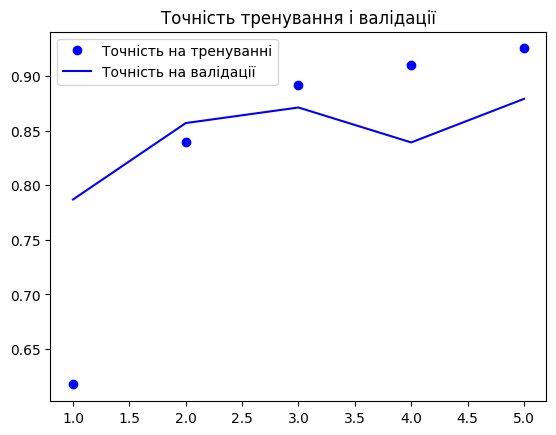

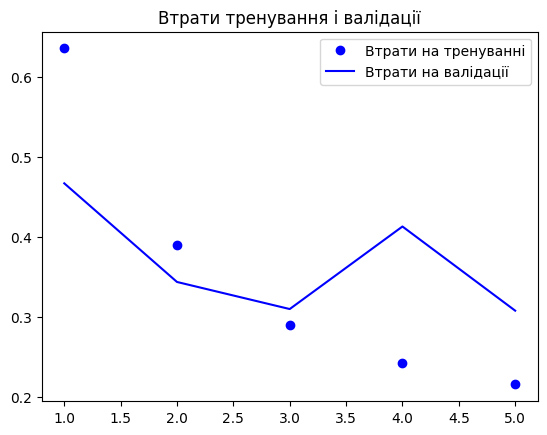

In [44]:
acc = history_drnn.history['acc']
val_acc = history_drnn.history['val_acc']
loss = history_drnn.history['loss']
val_loss = history_drnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [45]:
predictions = model_drnn.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model_drnn.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 73s 92ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 72s 93ms/step - loss: 0.3291 - acc: 0.8722
Test Loss: 0.3290958106517792
Test Accuracy: 0.872160017490387
